In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
import numpy as np
import pandas as pd
from pandas import concat
from pandas import DataFrame
import matplotlib.pyplot as plt

# Data cleaning

In [56]:
swiss_temp_df = pd.read_csv('asos.csv', sep = ',')
swiss_temp_df.head()

,station,valid,lon,lat,elevation,tmpc
0,LSZA,1935-01-01 06:00,8.9092,46.0015,276.0,0.0
1,LSGG,1935-01-01 06:00,6.1278,46.2475,416.0,4.0
2,LSZA,1935-01-01 12:00,8.9092,46.0015,276.0,13.0
3,LSZA,1935-01-01 18:00,8.9092,46.0015,276.0,5.0
4,LSZA,1935-01-02 06:00,8.9092,46.0015,276.0,3.0


In [57]:
swiss_temp_df['year'] = swiss_temp_df['valid'].str.split('-').str[0] # Make new column
swiss_temp_df = swiss_temp_df.assign(temperature = lambda x: (5/9)*x['tmpc']-32)
swiss_temp_df

,station,valid,lon,lat,elevation,tmpc,year,temperature
0,LSZA,1935-01-01 06:00,8.9092,46.0015,276.0,0.0,1935,-32.000000
1,LSGG,1935-01-01 06:00,6.1278,46.2475,416.0,4.0,1935,-29.777778
2,LSZA,1935-01-01 12:00,8.9092,46.0015,276.0,13.0,1935,-24.777778
3,LSZA,1935-01-01 18:00,8.9092,46.0015,276.0,5.0,1935,-29.222222
4,LSZA,1935-01-02 06:00,8.9092,46.0015,276.0,3.0,1935,-30.333333
...,...,...,...,...,...,...,...,...
5611831,LSGC,2021-11-02 23:50,6.7928,47.0838,1027.0,4.0,2021,-29.777778
5611832,LSGG,2021-11-02 23:50,6.1278,46.2475,416.0,7.0,2021,-28.111111
5611833,LSGS,2021-11-02 23:50,7.3303,46.2186,481.0,7.0,2021,-28.111111
5611834,LSMD,2021-11-02 23:50,8.6500,47.4000,448.0,3.0,2021,-30.333333


In [58]:
df = pd.DataFrame()
df = swiss_temp_df[['tmpc', 'year']]
df = df.rename(columns={'tmpc': 'temperature'})
df['year'] = df['year'].astype(int)
df['temperature'] = df['temperature'].astype(float)

swiss_grouped_df = df.groupby('year', as_index=False).median()

df = df.groupby('year', as_index=True).median()

swiss_grouped_df.head(30)


,year,temperature
0,1935,12.0
1,1936,10.0
2,1937,12.0
3,1938,12.0
4,1939,11.0
5,1955,8.9
6,1956,8.9
7,1957,10.0
8,1958,8.9
9,1959,10.0


# Model Training

## Splitting

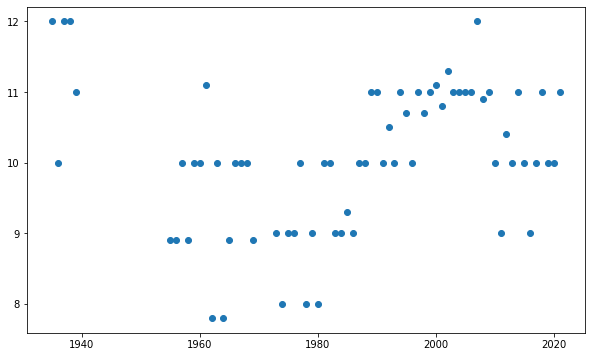

In [59]:
X = swiss_grouped_df['year'] 
y = swiss_grouped_df["temperature"]
plt.scatter(X,y)
X_x = X
X = X.values.reshape(-1, 1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

## Training

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Intercept={}, Slope={}".format(lin_reg.intercept_, lin_reg.coef_))
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

Intercept=9.091969512983587, Slope=[0.00056628]


In [62]:
for x in range(2022, 2031):
    temp = lin_reg.coef_*x+lin_reg.intercept_
    df2 = {'year' : f'{x}', 'temperature' : f'{temp[0]}'}
    swiss_grouped_df = swiss_grouped_df.append(df2, ignore_index=True)
swiss_grouped_df.tail(20)

,year,temperature
58,2011,9.0
59,2012,10.4
60,2013,10.0
61,2014,11.0
62,2015,10.0
63,2016,9.0
64,2017,10.0
65,2018,11.0
66,2019,10.0
67,2020,10.0


In [63]:
# from sklearn.model_selection import KFold 
# kfold = KFold(n_splits=3)
# print("Cross-validation scores:\n{}".format( cross_val_score(lin_reg, X.values.reshape(-1, 1), y.values.reshape(-1, 1), cv=kfold)))




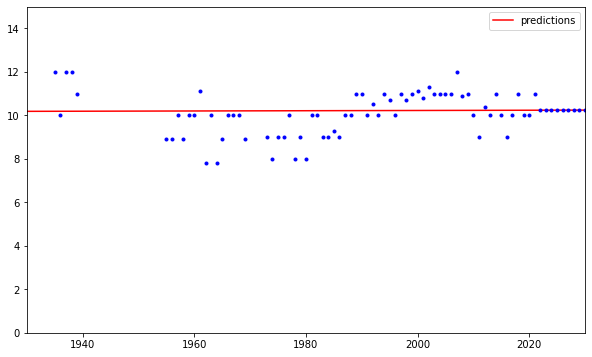

In [64]:
X_new = np.array([[0], [2030]])
y_predict = np.array([[intercept], [slope*2030+intercept]])


#visualization of the model's prediction
plt.plot(X_new, y_predict, "r-", label="predictions")
plt.plot(swiss_grouped_df['year'], swiss_grouped_df['temperature'], "b.")
plt.axis([1930, 2030, 0, 15])
plt.legend()
plt.show()


### TIME SERIES TO ML PROBLEM

In [65]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


# values = [x for x in range(10)]
data = series_to_supervised(df, 2, 1)
print(data)


      var1(t-2)  var1(t-1)  var1(t)
year                               
1937       12.0       10.0     12.0
1938       10.0       12.0     12.0
1939       12.0       12.0     11.0
1955       12.0       11.0      8.9
1956       11.0        8.9      8.9
...         ...        ...      ...
2017       10.0        9.0     10.0
2018        9.0       10.0     11.0
2019       10.0       11.0     10.0
2020       11.0       10.0     10.0
2021       10.0       10.0     11.0

[67 rows x 3 columns]


In [66]:
data.reset_index(level=0, inplace=True)
data

,year,var1(t-2),var1(t-1),var1(t)
0,1937,12.0,10.0,12.0
1,1938,10.0,12.0,12.0
2,1939,12.0,12.0,11.0
3,1955,12.0,11.0,8.9
4,1956,11.0,8.9,8.9
...,...,...,...,...
62,2017,10.0,9.0,10.0
63,2018,9.0,10.0,11.0
64,2019,10.0,11.0,10.0
65,2020,11.0,10.0,10.0


In [67]:
X = data.values[:, 0:3]  # get input values from first two columns
y = data.values[:, 3]  # get output values from last coulmn
m = len(y) # Number of training examples

print('Total no of training examples (m) = %s \n' %(m))

# Show only first 5 records
for i in range(5):
    print('X =', X[i, ], ', y =', y[i])

Total no of training examples (m) = 67 

X = [1937.   12.   10.] , y = 12.0
X = [1938.   10.   12.] , y = 12.0
X = [1939.   12.   12.] , y = 11.0
X = [1955.   12.   11.] , y = 8.9
X = [1956.    11.     8.9] , y = 8.9


In [68]:
model_ols = LinearRegression(normalize=True)
model_ols.fit(X,y) 
# fit() method is used for training the model
# Note the first parameter(feature) is must be 2D array(feature matrix)

LinearRegression(normalize=True)

In [69]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

LinearRegression(normalize=True)

In [70]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)
# slope = coef[0]+coef[1]

coef=  [0.00587437 0.29695726 0.30784623]
intercept=  -7.706223638209604


In [71]:
predTemp = pd.DataFrame(model_ols.predict(X), columns=['Predicted Temperature']) # Create new dataframe of column'Predicted Price'
actualTemp = pd.DataFrame(y, columns=['Actual Temperature'])
actualTemp = actualTemp.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualTemp, predTemp],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
Actual Temperature,12.000000,12.000000,11.000000,8.900000,8.900000,10.00000,8.900000,10.000000,10.000000,11.100000,...,10.400000,10.00000,11.000000,10.000000,9.000000,10.00000,11.000000,10.000000,10.000000,11.000000
Predicted Temperature,10.314372,10.342024,10.941813,10.727956,9.790396,9.17266,9.517166,9.511062,9.528914,9.861442,...,9.853188,9.99309,10.291566,10.486504,10.481489,9.88256,9.899323,10.510001,10.504987,10.213904


Text(0.5, 1.0, 'Temperature From Dataset Vs Temperature Predicted By Model')

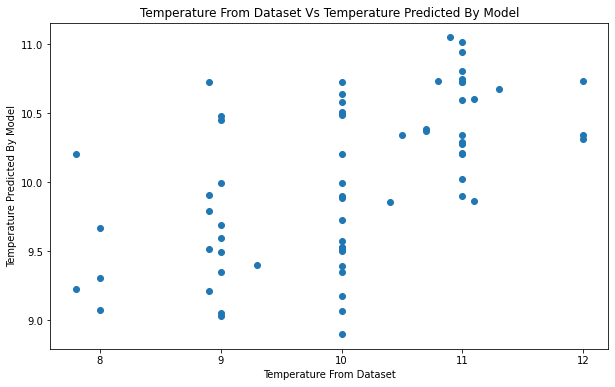

In [72]:
plt.scatter(y, model_ols.predict(X))
plt.xlabel('Temperature From Dataset')
plt.ylabel('Temperature Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Temperature From Dataset Vs Temperature Predicted By Model")

In [73]:
temp = model_ols.predict([[2022, 10, 11]])
print('Predicted temperature 2022 :', temp)
temp = model_ols.predict([[2023, 11, 10.52762428]])
print('Predicted temperature 2023 :', temp)
temp = model_ols.predict([[2024, 10.52762428, 10.68503681]])
print('Predicted temperature 2024 :', temp)
temp = model_ols.predict([[2025, 10.68503681, 10.59909463]])
print('Predicted temperature 2025 :', temp)
temp = model_ols.predict([[2026, 10.59909463, 10.62525682]])
print('Predicted temperature 2026 :', temp)
temp = model_ols.predict([[2027, 10.62525682, 10.61366396]])
print('Predicted temperature 2027 :', temp)
temp = model_ols.predict([[2028, 10.61366396, 10.62373856]])
print('Predicted temperature 2028 :', temp)
temp = model_ols.predict([[2029, 10.62373856, 10.62927177]])
print('Predicted temperature 2029 :', temp)
temp = model_ols.predict([[2030, 10.62927177, 10.63984124]])
print('Predicted temperature 2030 :', temp)
temp = model_ols.predict([[2031, 10.63984124, 10.6506125]])
print('Predicted temperature 2031 :', temp)
temp = model_ols.predict([[2032, 10.6506125, 10.66236123]])
print('Predicted temperature 2032 :', temp)

Predicted temperature 2022 : [10.52762428]
Predicted temperature 2023 : [10.68503681]
Predicted temperature 2024 : [10.59909463]
Predicted temperature 2025 : [10.62525682]
Predicted temperature 2026 : [10.61366396]
Predicted temperature 2027 : [10.62373856]
Predicted temperature 2028 : [10.62927177]
Predicted temperature 2029 : [10.63984124]
Predicted temperature 2030 : [10.6506125]
Predicted temperature 2031 : [10.66294144]
Predicted temperature 2032 : [10.67563121]


In [74]:
df2 = {'year': '2022', 'var1(t-2)': '10', 'var1(t-1)': '11', 'var1(t)' : '10.52762428'}
data = data.append(df2, ignore_index = True)
df2 = {'year': '2023', 'var1(t-2)': '11', 'var1(t-1)': '10.52762428', 'var1(t)' : '10.68503681'}
data = data.append(df2, ignore_index = True)
df2 = {'year': '2024', 'var1(t-2)': '10.52762428', 'var1(t-1)': '10.68503681', 'var1(t)' : '10.59909463'}
data = data.append(df2, ignore_index = True)
df2 = {'year': '2025', 'var1(t-2)': '10', 'var1(t-1)': '11', 'var1(t)' : '10.62525682'}
data = data.append(df2, ignore_index = True)
df2 = {'year': '2026', 'var1(t-2)': '10', 'var1(t-1)': '11', 'var1(t)' : '10.61366396'}
data = data.append(df2, ignore_index = True)
df2 = {'year': '2027', 'var1(t-2)': '10', 'var1(t-1)': '11', 'var1(t)' : '10.62373856'}
data = data.append(df2, ignore_index = True)
df2 = {'year': '2028', 'var1(t-2)': '10', 'var1(t-1)': '11', 'var1(t)' : '10.62927177'}
data = data.append(df2, ignore_index = True)
df2 = {'year': '2029', 'var1(t-2)': '10', 'var1(t-1)': '11', 'var1(t)' : '10.63984124'}
data = data.append(df2, ignore_index = True)
df2 = {'year': '2030', 'var1(t-2)': '10', 'var1(t-1)': '11', 'var1(t)' : '10.6506125'}
data = data.append(df2, ignore_index = True)
df2 = {'year': '2031', 'var1(t-2)': '10', 'var1(t-1)': '11', 'var1(t)' : '10.66294144'}
data = data.append(df2, ignore_index = True)
df2 = {'year': '2032', 'var1(t-2)': '10', 'var1(t-1)': '11', 'var1(t)' : '10.67563121'}
data = data.append(df2, ignore_index = True)
data['year'] = data['year'].astype(int)
data['var1(t)'] = data['var1(t)'].astype(float)
data.tail(20)

,year,var1(t-2),var1(t-1),var1(t)
58,2013,9.0,10.4,10.000000
59,2014,10.4,10.0,11.000000
60,2015,10.0,11.0,10.000000
61,2016,11.0,10.0,9.000000
62,2017,10.0,9.0,10.000000
63,2018,9.0,10.0,11.000000
64,2019,10.0,11.0,10.000000
65,2020,11.0,10.0,10.000000
66,2021,10.0,10.0,11.000000
67,2022,10,11,10.527624


In [75]:
# x_bho = np.array([[0], [2030]])
# y_bho = np.array([[intercept], [coef[0]*2030+intercept]])

# #visualization of the model's prediction
# plt.plot(x_bho, y_bho, "r-", label="predictions")
# plt.plot(data['year'], data['var1(t)'], "b.")
# plt.axis([1935, 2035, 0, 15])
# plt.legend()
# plt.show()

In [76]:
data = data.rename(columns={'var1(t)': 'median temperature'})
data.drop('var1(t-1)', 1, inplace = True)
data.drop('var1(t-2)', 1, inplace = True)
data

,year,median temperature
0,1937,12.000000
1,1938,12.000000
2,1939,11.000000
3,1955,8.900000
4,1956,8.900000
...,...,...
73,2028,10.629272
74,2029,10.639841
75,2030,10.650612
76,2031,10.662941


In [79]:
data.to_csv('multivar_predicted.csv', index=False)